# Trabalho 2 de IA

* Bruno Alvarenga Colturato,   11200251
* Che Fan Pan,                 11200421
* Eduardo Cavalari Valença,    11234381

In [2]:
import pandas
import seaborn
import numpy as np

In [3]:
datasets_names = ['cs', 
            'breast_cancer', 
            'diabetes', 
            'driving_behavior',
            'employee',
            'go_to_college',
            'phishing',
            'smoking',
            'social_network_ads',
            'water_quality']

datasets_files = list(map(lambda x : 'datasets/' + x + '.csv', datasets_names))
datasets = [None] * 10

# Pré-processamento

### CS:GO Round Winner Classification - dataset[0]

In [4]:
# Load data and drop empty rows
datasets[0] = pandas.read_csv(datasets_files[0])
datasets[0] = datasets[0].dropna(axis=0)

# Transform categorical data into many binary data 
datasets[0] = pandas.get_dummies(datasets[0], columns=["map"])

# Define target column
datasets[0] = datasets[0].rename(columns={'round_winner' : 'target'})

datasets[0]

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,target,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,CT,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,CT,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,CT,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,CT,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,CT,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,True,200.0,242.0,195.0,359.0,100.0,5950.0,...,0.0,T,0,0,0,0,0,0,1,0
122406,174.93,11.0,15.0,False,500.0,500.0,95.0,175.0,11500.0,23900.0,...,0.0,T,0,0,0,0,0,0,1,0
122407,114.93,11.0,15.0,False,500.0,500.0,495.0,475.0,1200.0,6700.0,...,0.0,T,0,0,0,0,0,0,1,0
122408,94.93,11.0,15.0,False,500.0,500.0,495.0,475.0,1200.0,6700.0,...,0.0,T,0,0,0,0,0,0,1,0


### Breast Cancer - dataset[1]

In [5]:
# Load data and drop empty rows
datasets[1] = pandas.read_csv(datasets_files[1])
datasets[1] = datasets[1].dropna(axis=0)

# Drop useless column
datasets[1] = datasets[1].drop(columns=['id'])

# Define target column
datasets[1] = datasets[1].rename(columns={'diagnosis' : 'target'})

datasets[1]

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Diabetes - dataset[2]

In [6]:
# Load data and drop empty rows
datasets[2] = pandas.read_csv(datasets_files[2])
datasets[2] = datasets[2].dropna(axis=0)

# Transform categorical data into many binary data 
columns2 = datasets[2].columns.values.tolist()
columns2.remove('Diabetic')
datasets[2] = pandas.get_dummies(datasets[2], columns=columns2)

# Define target column
datasets[2] = datasets[2].rename(columns={'Diabetic' : 'target'})

datasets[2]

,target,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,Family_Diabetes_no,Family_Diabetes_yes,highBP_no,...,BPLevel_normal,Pregancies_0.0,Pregancies_1.0,Pregancies_2.0,Pregancies_3.0,Pregancies_4.0,Pdiabetes_0,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often
0,no,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,no,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,no,1,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,no,0,1,0,0,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
4,no,1,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,yes,0,0,0,1,0,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
947,yes,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
948,no,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
949,no,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0


### Driving behavior - dataset[3]

In [7]:
# Load data and drop empty rows
datasets[3] = pandas.read_csv(datasets_files[3])
datasets[3] = datasets[3].dropna(axis=0)

# Drop useless column
datasets[3] = datasets[3].drop(columns=['Timestamp'])

# Define target column
datasets[3] = datasets[3].rename(columns={'Class' : 'target'})

datasets[3]

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,target
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL
...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW


### Employee - dataset[4]

In [8]:
# Load data and drop empty rows
datasets[4] = pandas.read_csv(datasets_files[4])
datasets[4] = datasets[4].dropna(axis=0)

# Transform categorical data into many binary data 
datasets[4] = pandas.get_dummies(datasets[4])

# Define target column
datasets[4] = datasets[4].rename(columns={'LeaveOrNot' : 'target'})

datasets[4]

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,target,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3,38,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,1,0,0,1,0,0,1,0,1,0
4649,2013,2,37,2,1,0,1,0,0,0,1,0,1,1,0
4650,2018,3,27,5,1,0,1,0,0,1,0,0,1,1,0
4651,2012,3,30,2,0,1,0,0,1,0,0,0,1,0,1


### Go to college - dataset[5]

In [9]:
# Load data and drop empty rows
datasets[5] = pandas.read_csv(datasets_files[5])
datasets[5] = datasets[5].dropna(axis=0)

# Transform categorical data into many binary data 
datasets[5] = pandas.get_dummies(datasets[5])

# Define target column
datasets[5] = datasets[5].rename(columns={'in_college' : 'target'})

datasets[5]["target"] = datasets[5]["target"].astype('uint8')

datasets[5]

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,target,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,gender_Female,gender_Male,interest_Less Interested,interest_Not Interested,interest_Quiet Interested,interest_Uncertain,interest_Very Interested,residence_Rural,residence_Urban
0,56,6950000,83.0,84.09,False,1,1,0,1,0,0,1,1,0,0,0,0,0,1
1,57,4410000,76.8,86.91,False,1,1,0,1,0,0,1,1,0,0,0,0,0,1
2,50,6500000,80.6,87.43,False,1,1,0,0,1,1,0,0,0,0,0,1,0,1
3,49,6600000,78.2,82.12,True,1,0,1,0,1,0,1,0,0,0,0,1,1,0
4,57,5250000,75.1,86.79,False,0,1,0,1,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49,7420000,63.6,85.99,True,1,0,1,1,0,1,0,0,0,0,0,1,1,0
996,51,7480000,84.3,89.72,True,1,1,0,0,1,1,0,1,0,0,0,0,1,0
997,49,5550000,75.2,79.56,False,1,0,1,1,0,0,1,1,0,0,0,0,0,1
998,53,5840000,105.8,87.18,True,1,1,0,0,1,0,1,0,0,0,1,0,1,0


### Phishing - dataset[6]

In [10]:
# Load data and drop empty rows
datasets[6] = pandas.read_csv(datasets_files[6])
datasets[6] = datasets[6].dropna(axis=0)

# Transform categorical data into many binary data 
datasets[6] = pandas.get_dummies(datasets[6])

# Drop useless column
datasets[6] = datasets[6].drop(columns=['Index'])

# Define target column
datasets[6] = datasets[6].rename(columns={'class' : 'target'})
datasets[6]["target"].replace(to_replace = -1, value = 0, inplace=True)

datasets[6]

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,target
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,0
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,0
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,0


### Smoking - dataset[7]

In [11]:
# Load data and drop empty rows
datasets[7] = pandas.read_csv(datasets_files[7])
datasets[7] = datasets[7].dropna(axis=0)

# Transform categorical data into many binary data 
datasets[7] = pandas.get_dummies(datasets[7])

# Drop useless column
datasets[7] = datasets[7].drop(columns=['ID'])

# Define target column
datasets[7] = datasets[7].rename(columns={'smoking' : 'target'})

datasets[7]

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,AST,ALT,Gtp,dental caries,target,gender_F,gender_M,oral_Y,tartar_N,tartar_Y
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,18.0,19.0,27.0,0,0,1,0,1,0,1
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,22.0,19.0,18.0,0,0,1,0,1,0,1
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,21.0,16.0,22.0,0,1,0,1,1,1,0
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,19.0,26.0,18.0,0,0,0,1,1,0,1
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,16.0,14.0,22.0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,...,14.0,7.0,10.0,1,0,1,0,1,0,1
55688,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,...,20.0,12.0,14.0,0,0,1,0,1,0,1
55689,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,...,17.0,11.0,12.0,0,0,1,0,1,1,0
55690,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,...,20.0,19.0,18.0,0,0,0,1,1,1,0


### Social network ads - dataset[8]

In [12]:

# Load data and drop empty rows
datasets[8] = pandas.read_csv(datasets_files[8])
datasets[8] = datasets[8].dropna(axis=0)

# Transform categorical data into many binary data 
datasets[8] = pandas.get_dummies(datasets[8])

# Drop useless column
datasets[8] = datasets[8].drop(columns=['User ID'])

# Define target column
datasets[8] = datasets[8].rename(columns={'Purchased' : 'target'})

datasets[8]

,Age,EstimatedSalary,target,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


### Water quality - dataset[9]

In [13]:
# Load data and drop empty rows
datasets[9] = pandas.read_csv(datasets_files[9])
datasets[9] = datasets[9].dropna(axis=0)

# Define target column
datasets[9] = datasets[9].rename(columns={'is_safe' : 'target'})

datasets[9]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,target
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


# Análise de dados

In [14]:
# All columns except target
X = [None] * 10
# Target column
Y = [None] * 10

for i, dataset in enumerate(datasets):
    X[i] = dataset.loc[:, dataset.columns != 'target'] 
    Y[i] = np.array(dataset.loc[:, dataset.columns == 'target']).ravel()

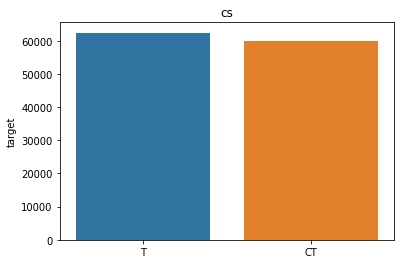

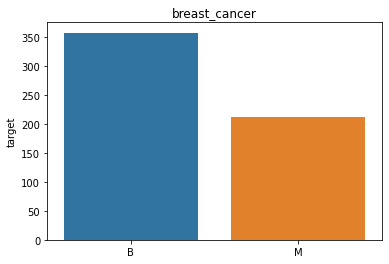

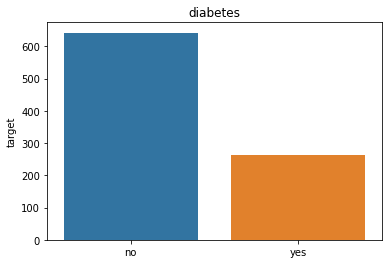

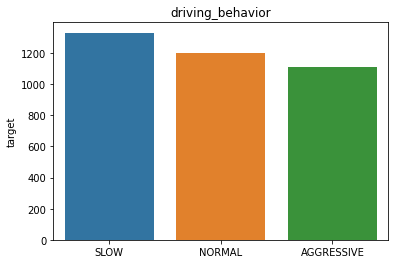

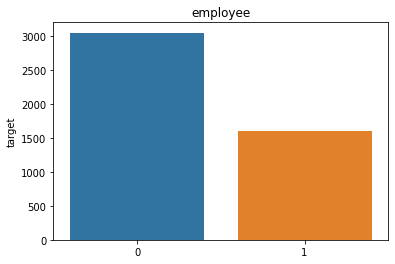

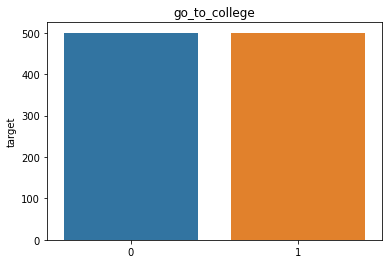

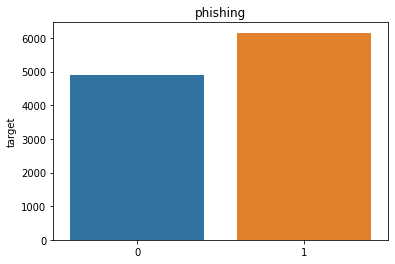

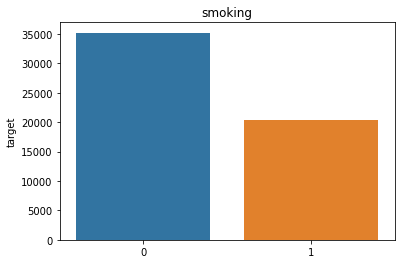

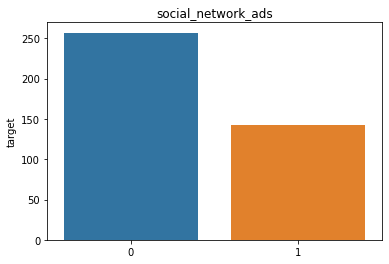

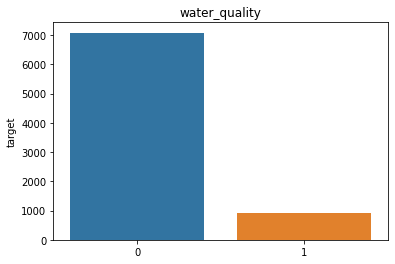

In [15]:
import matplotlib.pyplot as plt

# Type of evaluation
scoring_choosed = [None] * 10

for i, dataset in enumerate(datasets):
    # Para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
    class_distribuition = pandas.DataFrame(dataset['target'].value_counts())
    
    plt.figure()

    # Usamos o frame criado acima para plot a frequencia de cada classe no dataset
    plot = seaborn.barplot(x=class_distribuition.index, y='target', data = class_distribuition)
    plot.set_title(datasets_names[i])

    total_sum = sum(class_distribuition['target'])
    partition = total_sum/len(class_distribuition['target'])
    for value in class_distribuition['target']:
        if(0.9 * partition <= value <= 1.1 * partition):
            scoring_choosed[i] = "accuracy" 
        else:
            scoring_choosed[i] = "balanced_accuracy"
            break

In [16]:
# importa metodos de classicacao
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
# instancia os classificador 
DTC = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
GNB = GaussianNB()
MLP = MLPClassifier()

In [18]:
DTC_parameters = {'criterion' : ['gini','entropy','log_loss'], 'random_state' : [42]}
KNN_parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}
GNB_parameters = {}
MLP_parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)], 'max_iter' : [3000], 'random_state' : [42]}

In [19]:
GS_DTC = [None] * 10
GS_KNN = [None] * 10
GS_GNB = [None] * 10
GS_MLP = [None] * 10

for i, choosed in enumerate(scoring_choosed):
    GS_DTC[i] = GridSearchCV(DTC, DTC_parameters, cv = 10, scoring = choosed)
    GS_KNN[i] = GridSearchCV(KNN, KNN_parameters, cv = 10, scoring = choosed)
    GS_GNB[i] = GridSearchCV(GNB, GNB_parameters, cv = 10, scoring = choosed)
    GS_MLP[i] = GridSearchCV(MLP, MLP_parameters, cv = 10, scoring = choosed)

In [20]:
# treina o classificador com o conjunto de treino
for i in range(len(datasets)):
    GS_DTC[i].fit(X[i], Y[i])
    GS_KNN[i].fit(X[i], Y[i])
    GS_GNB[i].fit(X[i], Y[i])
    GS_MLP[i].fit(X[i], Y[i])


In [46]:
heue = GridSearchCV(DTC, DTC_parameters, cv = 10, scoring = 'f1')
heue.fit(X[1],Y[1])
heue_results = pandas.DataFrame(heue.cv_results_)
heue_results

c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\eduar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1132, in f1_score
    return fbeta_score(
  File "c:\Users

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011501,0.001748,0.002597,0.000662,gini,42,"{'criterion': 'gini', 'random_state': 42}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.012599,0.001805,0.002601,0.000922,entropy,42,"{'criterion': 'entropy', 'random_state': 42}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,0.011088,0.000927,0.002307,0.000437,log_loss,42,"{'criterion': 'log_loss', 'random_state': 42}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [21]:
results_DTC = [None] * 10
results_KNN = [None] * 10
results_GNB = [None] * 10
results_MLP = [None] * 10

for i in range(len(datasets)):
    results_DTC[i] = pandas.DataFrame(GS_DTC[i].cv_results_)
    results_KNN[i] = pandas.DataFrame(GS_KNN[i].cv_results_)
    results_GNB[i] = pandas.DataFrame(GS_GNB[i].cv_results_)
    results_MLP[i] = pandas.DataFrame(GS_MLP[i].cv_results_)

In [22]:
view = ['params', 'mean_test_score','std_test_score', 'rank_test_score']

for i in range(len(datasets)):
    results_DTC[i] = results_DTC[i][view].sort_values(by='rank_test_score')
    results_KNN[i] = results_KNN[i][view].sort_values(by='rank_test_score')
    results_GNB[i] = results_GNB[i][view].sort_values(by='rank_test_score')
    results_MLP[i] = results_MLP[i][view].sort_values(by='rank_test_score')

In [34]:
for i, dataset in enumerate(datasets_names):
    print(f'Para o dataset {dataset}:')
    print(f'\tA acurácia do Classificador DTC é: {results_DTC[i]["mean_test_score"][0] :.2%}')
    print(f'\tA acurácia do Classificador KNN é: {results_KNN[i]["mean_test_score"][0] :.2%}')
    print(f'\tA acurácia do Classificador GNB é: {results_GNB[i]["mean_test_score"][0] :.2%}')
    print(f'\tA acurácia do Classificador MLP é: {results_MLP[i]["mean_test_score"][0] :.2%}')
    print()

Para o dataset cs:
	A acurácia do Classificador DTC é: 69.93%
	A acurácia do Classificador KNN é: 66.99%
	A acurácia do Classificador GNB é: 73.03%
	A acurácia do Classificador MLP é: 74.07%

Para o dataset breast_cancer:
	A acurácia do Classificador DTC é: 92.54%
	A acurácia do Classificador KNN é: 90.42%
	A acurácia do Classificador GNB é: 92.65%
	A acurácia do Classificador MLP é: 91.99%

Para o dataset diabetes:
	A acurácia do Classificador DTC é: 94.72%
	A acurácia do Classificador KNN é: 92.97%
	A acurácia do Classificador GNB é: 56.77%
	A acurácia do Classificador MLP é: 93.11%

Para o dataset driving_behavior:
	A acurácia do Classificador DTC é: 36.74%
	A acurácia do Classificador KNN é: 35.43%
	A acurácia do Classificador GNB é: 40.12%
	A acurácia do Classificador MLP é: 42.02%

Para o dataset employee:
	A acurácia do Classificador DTC é: 77.69%
	A acurácia do Classificador KNN é: 70.98%
	A acurácia do Classificador GNB é: 67.09%
	A acurácia do Classificador MLP é: 64.50%

Par

In [24]:

datasets_algs = [[] for _ in range(len(datasets))]

for i, algs in enumerate(datasets_algs):
    algs.append({"name": "DTC", "results": results_DTC[i]})
    algs.append({"name": "KNN", "results": results_KNN[i]})
    algs.append({"name": "GNB", "results": results_GNB[i]})
    algs.append({"name": "MLP", "results": results_MLP[i]})
    algs.sort(key = lambda acc : acc["results"]["mean_test_score"][0], reverse = True)

    print(f'Dataset: {datasets_names[i]}')
    for alg in algs:
        print(f'\t{alg["name"]}, media: {alg["results"]["mean_test_score"][0]}, dp: {alg["results"]["std_test_score"][0]}')
    print()


Dataset: cs
	MLP, media: 0.7407156278081856, dp: 0.009854957169476897
	GNB, media: 0.7302671350379871, dp: 0.007144051038205445
	DTC, media: 0.6992892737521443, dp: 0.004474193623484673
	KNN, media: 0.6698880810391308, dp: 0.008363147416997365
Dataset: breast_cancer
	GNB, media: 0.9265331890331889, dp: 0.03343992490690495
	DTC, media: 0.9253535353535354, dp: 0.03879138010935533
	MLP, media: 0.9198737373737375, dp: 0.02917625029840954
	KNN, media: 0.9041991341991343, dp: 0.029975390688040598
Dataset: diabetes
	DTC, media: 0.9471741452991452, dp: 0.032332328890527
	MLP, media: 0.931090633903134, dp: 0.0382692812873986
	KNN, media: 0.9296594551282051, dp: 0.04477834365428389
	GNB, media: 0.5676923076923077, dp: 0.033517227849046684
Dataset: driving_behavior
	MLP, media: 0.42015429775703755, dp: 0.029249537415903595
	GNB, media: 0.40120728586482013, dp: 0.046874711094433655
	DTC, media: 0.3674228511214813, dp: 0.03168339207227928
	KNN, media: 0.3542819509257865, dp: 0.01889796478090317
Dat

In [25]:
from math import sqrt

diferenca_absoluta = [None] * 10

for i, algs in enumerate(datasets_algs):
    media_err_A0 = 1 - algs[0]["results"]["mean_test_score"][0]
    dp_A0 = algs[0]["results"]["std_test_score"][0]

    media_err_A1 = 1 - algs[1]["results"]["mean_test_score"][0]
    dp_A1 = algs[1]["results"]["std_test_score"][0]

    dif_media_err = media_err_A0 - media_err_A1
    desvio_padrao = sqrt( (dp_A0**2 + dp_A1**2) / 2.0 )
    diferenca_absoluta[i] = dif_media_err / desvio_padrao

In [33]:
for i, algs in enumerate(datasets_algs):
    print(f'Dataset: {datasets_names[i]}, diferenca_absoluta: {diferenca_absoluta[i]}')
    if diferenca_absoluta[i] > 0:
        if diferenca_absoluta[i] >= 2:
            print(f'{algs[1]["name"]} tem melhor performance que {algs[0]["name"]} com nível de confiança de 95%')
        else:
            print(f'{algs[1]["name"]} tem melhor performance que {algs[0]["name"]}')
    else:
        if diferenca_absoluta[i] <= -2:
            print(f'{algs[0]["name"]} tem melhor performance que {algs[1]["name"]} com nível de confiança de 95%')
        else:
            print(f'{algs[0]["name"]} tem melhor performance que {algs[1]["name"]}')
    print()

Dataset: cs, diferenca_absoluta: -1.2139662411911816
MLP tem melhor performance que GNB

Dataset: breast_cancer, diferenca_absoluta: -0.032573948099465254
GNB tem melhor performance que DTC

Dataset: diabetes, diferenca_absoluta: -0.45401077062389245
DTC tem melhor performance que MLP

Dataset: driving_behavior, diferenca_absoluta: -0.4849627703119523
MLP tem melhor performance que GNB

Dataset: employee, diferenca_absoluta: -2.5095177118972916
DTC tem melhor performance que KNN com nível de confiança de 95%

Dataset: go_to_college, diferenca_absoluta: -3.018578894707481
DTC tem melhor performance que GNB com nível de confiança de 95%

Dataset: phishing, diferenca_absoluta: -0.0945601955228326
DTC tem melhor performance que KNN

Dataset: smoking, diferenca_absoluta: -0.18869921889651706
DTC tem melhor performance que KNN

Dataset: social_network_ads, diferenca_absoluta: -0.23920639643380975
GNB tem melhor performance que DTC

Dataset: water_quality, diferenca_absoluta: -0.1288616498809